<a href="https://colab.research.google.com/github/taehyeonk/pre-onboarding_project/blob/seondo/5%ED%8C%80_%EA%B8%B0%EC%97%85_%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [150]:
import torch
import pandas as pd
import numpy as np
from datasets import load_dataset

In [151]:
dataset = load_dataset("klue", "sts")

Reusing dataset klue (/root/.cache/huggingface/datasets/klue/sts/1.0.0/e0fc3bc3de3eb03be2c92d72fd04a60ecc71903f821619cb28ca0e1e29e4233e)


  0%|          | 0/2 [00:00<?, ?it/s]

In [161]:
# dataset train / validation 분리
train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])

In [162]:
train_df.head(3)

,guid,source,sentence1,sentence2,labels
0,klue-sts-v1_train_00000,airbnb-rtt,숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.,숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.,"{'label': 3.7, 'real-label': 3.714285714285714, 'binary-label': 1}"
1,klue-sts-v1_train_00001,policy-sampled,위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.,시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.,"{'label': 0.0, 'real-label': 0.0, 'binary-label': 0}"
2,klue-sts-v1_train_00002,paraKQC-sampled,회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.,사람들이 주로 네이버 메일을 쓰는 이유를 알려줘,"{'label': 0.3, 'real-label': 0.3333333333333333, 'binary-label': 0}"


In [163]:
## Pandas row, column 표기 제한 옵션
# pd.describe_option() # pandas 출력 옵션 확인
# pd.set_option('display.max_colwidth', None) # Column 표현 제한 해제, default 50
# pd.set_option('display.max_rows', None) # Row 표현 제한 100개까지, default 100

In [164]:
# Train Data 불용어 전처리 
train_df['sentence1'] = train_df['sentence1'].str.replace('\xa0','') # \xa0 
train_df['sentence1'] = train_df['sentence1'].str.replace('\(.*\)', '', regex=True) # 괄호 + 괄호안 내용 삭제

# train_df['sentence1'] = train_df['sentence1'].str.replace('→', ' ', regex=True) # 화살표 삭제(보류)
# train_df[train_df['sentence1'].str.contains('→')] # 화살표 포함 문장 확인

In [165]:
# Validation Data 불용어 전처리 
validation_df['sentence1'] = validation_df['sentence1'].str.replace('\xa0','') # \xa0 
validation_df['sentence1'] = validation_df['sentence1'].str.replace('\(.*\)', '', regex=True) # 괄호 + 괄호안 내용 삭제

# validation_df['sentence1'] = validation_df['sentence1'].str.replace('→', ' ', regex=True) # 화살표 삭제(보류)
# validation_df[train_df['sentence1'].str.contains('→')] # 화살표 포함 문장 확인

In [166]:
# Train/Validation labels → label로 변경(binary-label, real-label 미사용)
train_df['labels'] = train_df['labels'].apply(lambda x : x['label'])
validation_df['labels'] = validation_df['labels'].apply(lambda x : x['label'])

In [160]:
# 결측치 여부 확인
print(f'Train 데이터 수 : {len(train_df)}개, \n결측치 :\n{train_df.isnull().sum()}', '\n')
print(f'Validation 데이터 수 : {len(validation_df)}개, \n결측치 :\n{validation_df.isnull().sum()}')

Train 데이터 수 : 11668개, 
결측치 :
guid         0
source       0
sentence1    0
sentence2    0
labels       0
dtype: int64 

Validation 데이터 수 : 519개, 
결측치 :
guid         0
source       0
sentence1    0
sentence2    0
labels       0
dtype: int64


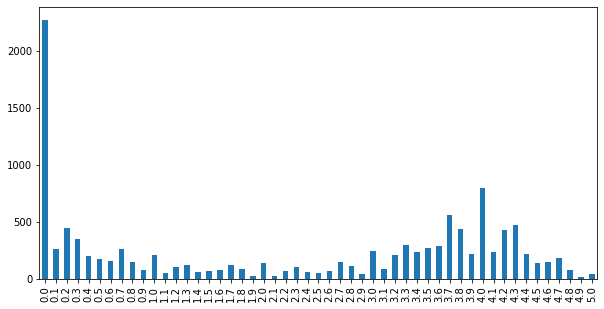

In [167]:
# Train Data label 분포
train_df['labels'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))

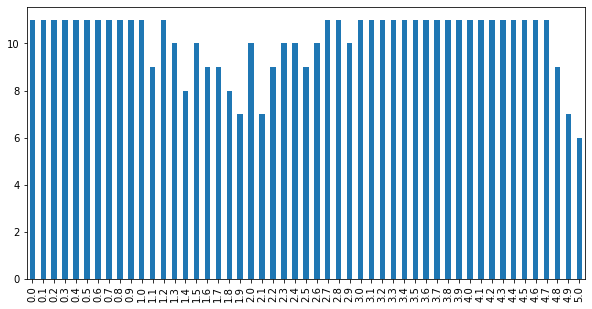

In [168]:
# Validation Data label 분포
validation_df['labels'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))